In [78]:
import spacy
import spacy.attrs
nlp = spacy.load("en_core_web_sm")
doc = nlp("It all happened between November 2007 and November 2008")

import warnings


warnings.simplefilter(action='ignore')

In [79]:
from spacy.attrs import ORTH


counts = doc.count_by(ORTH)

print(len(counts))

for word_id, count in sorted(counts.items(), reverse=True, key=lambda item: item[1]):
    print(count, nlp.vocab.strings[word_id])

8
2 November
1 It
1 all
1 happened
1 between
1 2007
1 and
1 2008


In [80]:
import pandas as pd


df = pd.read_csv("data/metadata.csv")

In [81]:
words_df = pd.DataFrame(columns=['token'])

tokens = []


abstracts = df['title'].to_list()
# .head(150000)

for abstract in abstracts:
    
    tokenised = nlp(str(abstract))
    normalised = [token.lemma_ for token in tokenised if not token.is_stop and not token.is_punct]

    for token in normalised:
        tokens.append(token)


words_df = pd.DataFrame({'token': tokens})

In [82]:
words_df.head

<bound method NDFrame.head of                token
0           clinical
1            feature
2            culture
3              prove
4         Mycoplasma
...              ...
1469324        novel
1469325  coronavirus
1469326     covid-19
1469327    structure
1469328      disease

[1469329 rows x 1 columns]>

In [83]:
counted_df = words_df['token'].value_counts(dropna=False)
counted_df.columns = ['token', 'count']

In [84]:
counted_df

# https://stackoverflow.com/questions/49500259/how-to-find-most-frequently-used-words-used-on-data-using-python
# wordcloud

covid-19        19975
COVID-19        17356
patient         11311
SARS            10937
virus           10805
                ...  
PARPS               1
amastigote          1
gbp24.95            1
cisnes              1
selfreported        1
Name: token, Length: 82573, dtype: int64

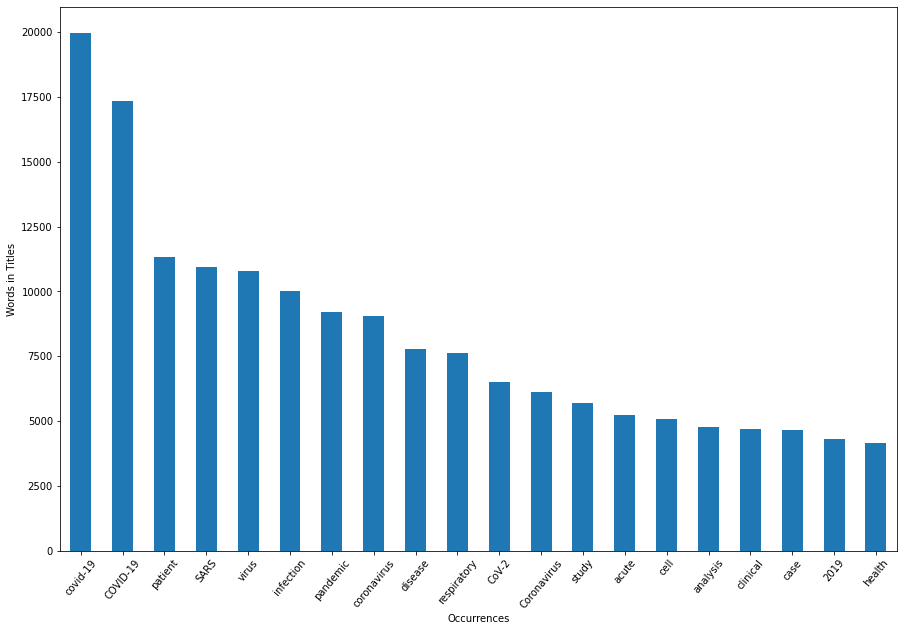

In [85]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
counted_df.head(20).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Occurrences")
plt.ylabel("Words in Titles")
plt.savefig('title_words_graph.svg', format='svg')
plt.show()

In [86]:
# Start with one review:
text = counted_df.head(20)

# Create and generate a word cloud image:
wordcloud = WordCloud(width=2000, height=1500).generate_from_frequencies(text)

# Display the generated image:
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.savefig('title_words_cloud.svg', format='svg')
plt.show()